In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

*Read Gambar*

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10096\94632917.py:2: SyntaxWarning: invalid escape sequence '\i'
  image_path = "Testdata\im0001.ppm"


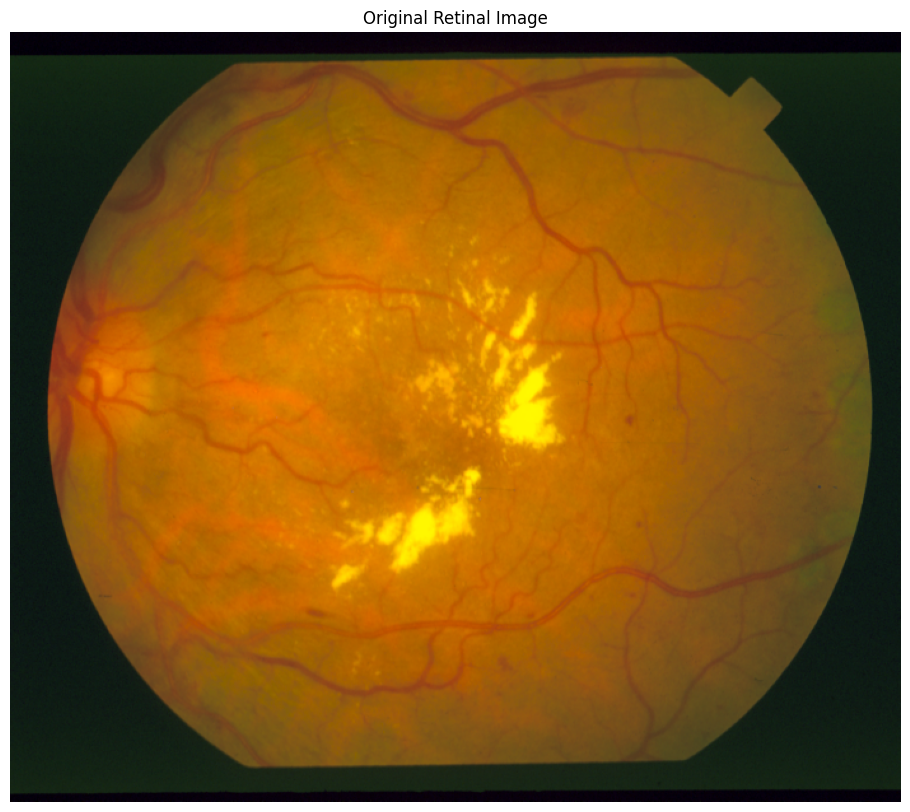

In [13]:
# Membaca gambar dari path yang diberikan
image_path = "Testdata\im0001.ppm"
raw_image = cv2.imread(image_path)

# Mengubah gambar dari BGR (OpenCV format) ke RGB (matplotlib format)
raw_image_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli (Raw Image)
plt.figure(figsize=(20, 10))
plt.title("Original Retinal Image")
plt.imshow(raw_image_rgb)
plt.axis('off')
plt.show()

MASKING GAMBAR

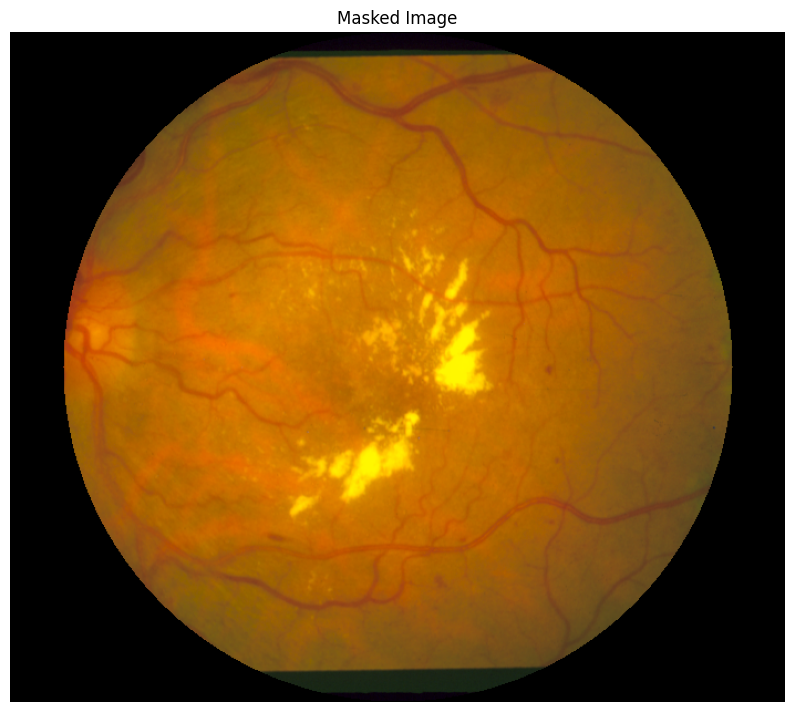

In [14]:
# Membuat masker dengan ukuran yang sama dengan gambar
mask = np.zeros(raw_image.shape[:2], dtype="uint8")

# Mendefinisikan pusat dan radius dari masker bundar
(h, w) = raw_image.shape[:2]
center = (w // 2, h // 2)
radius = min(center[0], center[1], w - center[0], h - center[1])

# Menggambar lingkaran putih di tengah masker hitam (0) dengan radius tertentu
for i in range(h):
    for j in range(w):
        if (i - center[1])**2 + (j - center[0])**2 <= radius**2:
            mask[i, j] = 255

# Terapkan masker pada gambar
masked_image = cv2.bitwise_and(raw_image_rgb, raw_image_rgb, mask=mask)

# Menampilkan gambar yang telah di-mask
plt.figure(figsize=(10, 10))
plt.title("Masked Image")
plt.imshow(masked_image)
plt.axis('off')
plt.show()


Gray Scale

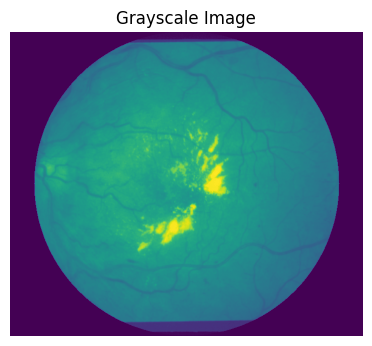

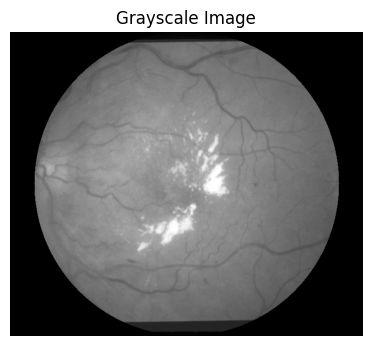

In [15]:
# Konversi gambar ke grayscale secara manual
gray_image = np.zeros((h, w), dtype="float32")
for i in range(h):
    for j in range(w):
        if mask[i, j] == 255:
            R = masked_image[i, j, 0]
            G = masked_image[i, j, 1]
            B = masked_image[i, j, 2]
            gray_value = 0.2989 * R + 0.5870 * G + 0.1140 * B
            gray_image[i, j] = gray_value

gray_image = (gray_image * 255 / gray_image.max()).astype("uint8")
# Menampilkan gambar grayscale
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(gray_image, vmin=0, vmax=255)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image,cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Enchanted